In [1]:
# Additional python packages
import os, urllib, io, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
import cv2
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from functions import *# Our functions 

Load images and names

In [2]:
images=[]
names=[]
for root, dirs, files in os.walk('../Data/final_dataset'):
    for name in files:
        mypath = os.path.join(root,name)
        img=Image.open(mypath)
        arr = np.array(img).astype('uint8')
        images.append(arr)
        img.close()
        names.append(name.split('.')[0])

In [3]:
perc_wrinkle=[perc_wrinkled(img) for img in images]

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning:

'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning:

'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.



26
5
28
5
27
5
26
5
28
5
26
5
27
5
28
5
26
5
26
5
25
5
28
5
26
5
27
5
27
5
26
5
26
5
31
6
26
5
25
5
29
5
26
5
25
5
25
5
24
4
23
4
31
6
25
5
25
5
26
5
27
5
26
5
28
5
27
5
33
6
31
6
34
6
31
6
33
6
34
6
32
6
32
6
36
7
33
6
32
6
32
6
31
6
35
7
33
6
32
6
34
6
31
6
32
6
38
7
32
6
31
6
32
6
31
6
30
6
33
6
34
6
31
6
37
7
31
6
31
6
31
6
30
6
32
6
33
6
32
6
39
7
38
7
39
7
36
7


/Users/msorba/Documents/Columbia courses/DSI capstone/dsi-capstone/functions.py:208: RuntimeWarning:

divide by zero encountered in int_scalars



36
7
37
7
36
7
36
7
38
7
37
7
38
7
39
7
37
7
42
8
38
7
36
7
37
7
35
7
37
7
41
8
35
7
36
7
40
8
36
7
34
6
35
7
41
8
35
7
44
8
35
7
35
7
38
7
36
7
35
7
36
7
35
7
42
8
43
8
45
9
43
8
42
8
43
8
43
8
44
8
43
8
43
8
43
8
44
8
44
8
45
9
43
8
41
8
46
9
43
8
43
8
51
10
43
8
43
8
44
8
42
8
40
8
42
8
45
9
42
8
50
10
39
7
42
8
44
8
40
8
41
8
44
8
41
8
46
9
48
9
53
10
52
10
51
10
52
10
53
10
51
10
50
10
52
10
50
10
53
10
50
10
56
11
50
10
51
10
51
10
52
10
54
10
60
12
54
10
56
11
56
11
51
10
48
9
48
9
51
10
54
10
60
12
50
10
50
10
51
10
53
10
50
10
59
11
51
10
57
11
61
12
25
5
22
4
21
4
22
4
29
5
23
4
24
4
28
5
23
4
22
4
24
4
26
5
22
4
22
4
23
4
24
4
23
4
23
4
25
5
24
4
24
4
24
4
24
4
24
4
27
5
24
4
24
4
24
4
23
4
25
5
23
4
24
4
23
4
24
4
23
4
24
4
32
6
30
6
28
5
30
6
36
7
29
5
30
6
35
7
31
6
30
6
30
6
32
6
32
6
29
5
29
5
34
6
33
6
30
6
35
7
32
6
33
6
31
6
30
6
31
6
35
7
30
6
31
6
33
6
29
5
32
6
31
6
30
6
31
6
31
6
29
5
33
6
37
7
37
7
36
7
35
7
42
8
35
7
38
7
40
8
36
7
35
7
36
7
36
7
39
7
36
7
34
6

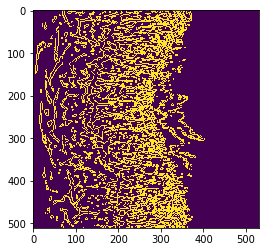

In [4]:
n_lines=[detect_lines(img)[1] for img in images]

In [5]:
gene=[name.split('_')[0] for name in names]
days=[int(name.split('_')[1]) for name in names]
biofilm_number=[name.split('_')[2] for name in names]

In [6]:
dic={'label':names,'gene':gene,'days':days,'biofilm_number':biofilm_number,'perc_wrinkle':perc_wrinkle,'n_lines':n_lines}

In [7]:
df_total=pd.DataFrame.from_dict(dic)

In [9]:
df_total.to_csv('df_final.csv')